<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Import packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import re
from collections import Counter
from itertools import chain
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/SHAI/sentiment_tweets3.csv')

In [12]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [13]:
# Load the tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
# Load stop words
nltk.download('stopwords')
stopwords_list = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# Load lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
# Convert to lowercase
df['message to examine'] = df['message to examine'].str.lower()
# Remove links
df['message to examine'] = df['message to examine'].apply(lambda x: re.sub('(http)\S+', '', x))
# Remove RT
df['message to examine'] = df['message to examine'].apply(lambda x: re.sub('(RT)\s(@)\S+', '', x))
# Remove mentions
df['message to examine'] = df['message to examine'].apply(lambda x: re.sub('(@)\S+', '', x))
# Remove hashtags
df['message to examine'] = df['message to examine'].apply(lambda x: re.sub('(#)\S+', '', x))
# Remove HTML tags
df['message to examine'] = df['message to examine'].apply(lambda x: re.sub('[<](a href)*[/]*\S+[>]', '', x))
# Lemmatize text
df['message to examine'] = df['message to examine'].apply(lambda x: lemmatizer.lemmatize(x))
# Tokenize tweets
df['message to examine'] = df['message to examine'].apply(lambda x: tokenizer.tokenize(x))
# Remove stop words
df['message to examine'] = df['message to examine'].apply(lambda x: [word for word in x if word not in stopwords_list])

In [18]:
# Check a sample for tweets
print(df.loc[20,'message to examine'])

['able', 'sleep', 'think', 'watch', 'ugly', 'betty', 'online']


In [20]:
# Flatten lists
tokens = list(chain(*df['message to examine']))
print(tokens[:10])

['real', 'good', 'moment', 'missssssssss', 'much', 'reading', 'manga', 'need', 'send', 'em']


In [21]:
# Counting words
word_counts = Counter(tokens,sorted=True)

In [23]:
# Getting most common words
mc_word_keys = [word_counts.most_common(20)[i][0] for i in range(20)]
print(mc_word_keys)

['depression', 'good', 'day', 'love', 'like', 'twitter', 'get', 'â', 'quot', 'lol', 'time', 'know', 'today', 'u', 'go', 'going', 'one', 'thanks', 'emoji', 'com']


In [24]:
# Getting least common words
lc_word_keys = [word_counts.most_common()[i][0] for i in range(len(word_counts)-20,len(word_counts))]
print(lc_word_keys)

['nityanandam', 'shree', 'moyai', 'c6jssmcffx', 'fvck', 'sacrifices', 'maga', 'trickle', 'trillions', 'rightwards', 'qggbqpzumr', 'gteens', 'dolls', 'hmcwffkyu7', 'bharat', 'provoking', 'persistent', 'nagging', 'herbo', 'succumbs']


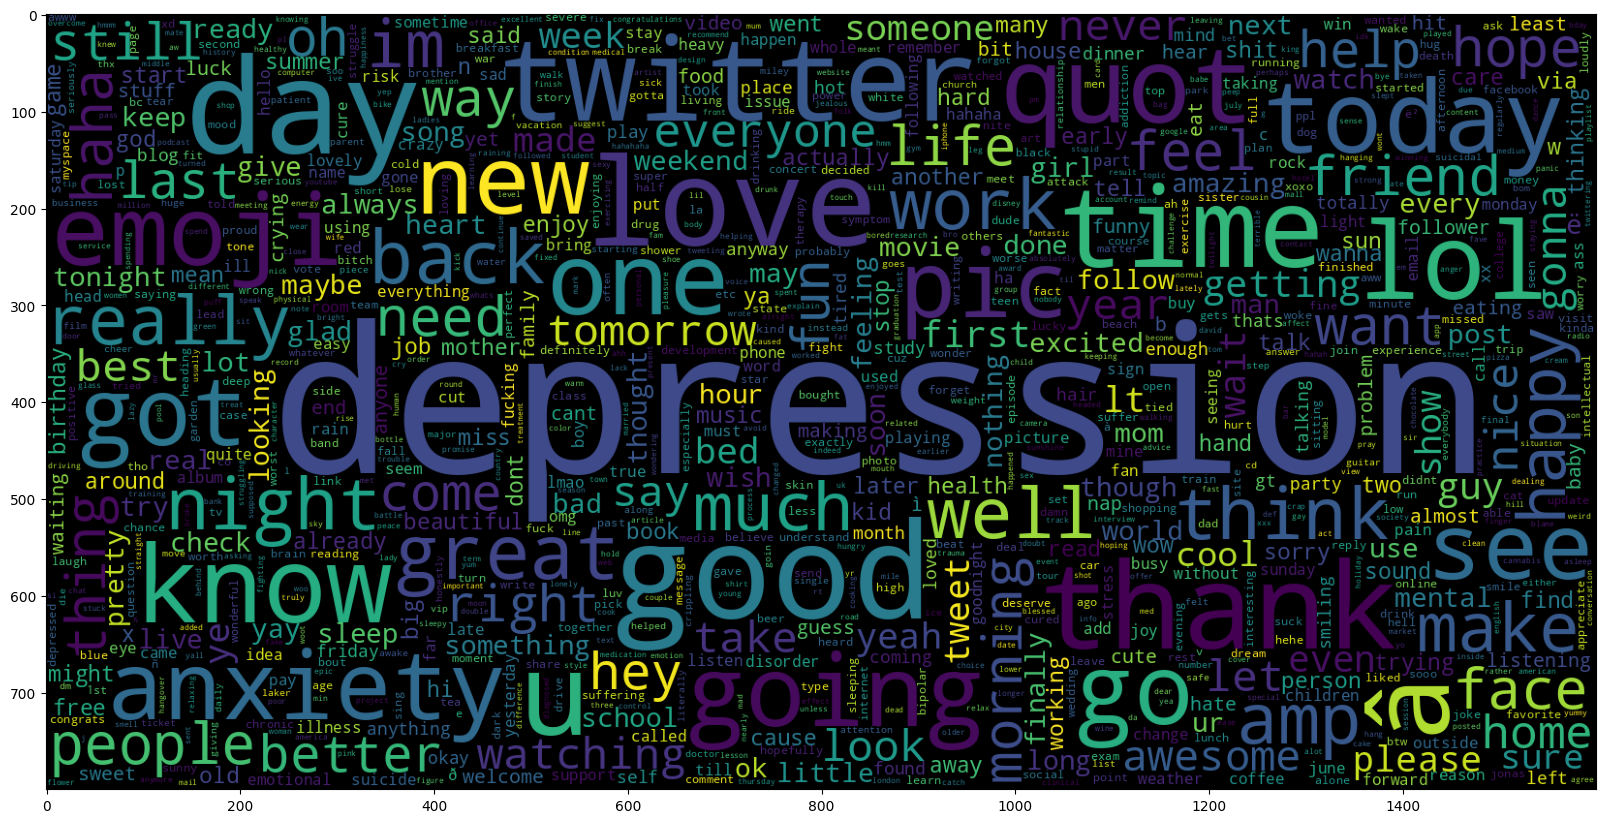

In [28]:
# Visualizing most common tokens in big font size
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(tokens))
plt.imshow(wc)